In [33]:
import pandas as pd
import numpy as np
import pandas as pd
from datetime import datetime
import pytz
import copy
import datetime as datetime
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_style("darkgrid", {"grid.color": ".6", "grid.linestyle": ":"})

In [34]:
df = pd.read_csv("5yearagoresults_4:1.csv")

In [35]:
df

,Symbol,WinRate,Returns,Actual_Ret,Prev_Volatility,Prev_Returns_CAGR,Previous_Sharpe,No.,CAGR,Vol,Sharpe,Drawdown,Calmar
0,OMAXE,45.454545,1.082317,0.413652,0.136941,-2.334340,-0.535584,11,0.893488,19.184492,-0.214054,31.841493,0.028060
1,HDFCBANK,80.000000,1.302759,1.592621,0.160597,29.061961,1.498279,5,3.018786,8.944956,-0.221490,10.134607,0.297869
2,PGHH,66.666667,1.666598,1.612481,0.192800,21.454811,0.853463,9,5.911917,21.508934,0.042397,10.192311,0.580037
3,GLAXO,50.000000,2.019426,2.215972,0.200961,13.871967,0.441478,8,8.223812,32.120185,0.100367,21.521828,0.382115
4,COLPAL,77.777778,2.153682,2.403231,0.204077,19.823730,0.726380,9,9.009968,24.347628,0.164696,10.180818,0.884994
...,...,...,...,...,...,...,...,...,...,...,...,...,...
378,ITI,70.000000,2.201410,2.369176,0.629166,5.903265,0.014357,10,9.278986,25.827897,0.165673,11.425104,0.812158
379,PCJEWELLER,63.157895,10.686873,0.151564,0.693912,2.489738,-0.036176,19,30.525104,65.400511,0.390289,19.396212,1.573766
380,JPASSOCIAT,64.285714,5.600478,0.741627,0.713636,-4.571925,-0.134129,14,21.377382,50.653116,0.323324,19.501030,1.096218
381,RCOM,26.666667,0.452601,0.072210,0.718670,-15.992976,-0.292109,15,-8.528620,15.216425,-0.889080,54.739945,-0.155803


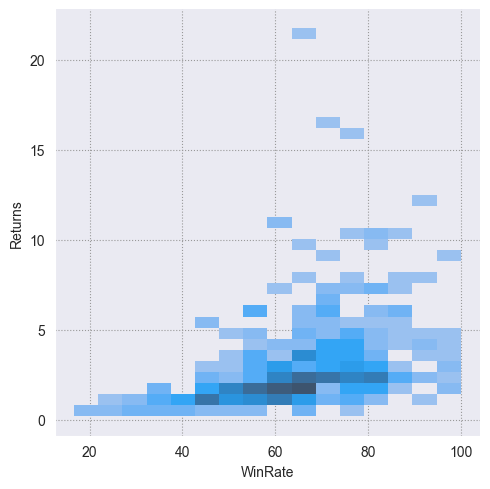

In [36]:
sns.displot(df,y="Returns",x="WinRate")

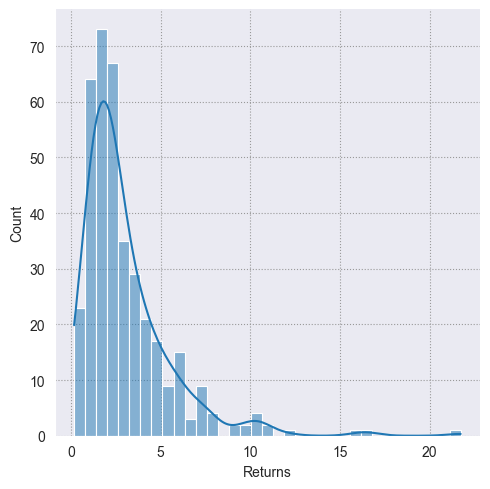

In [37]:
sns.displot(df["Returns"],kde=True)

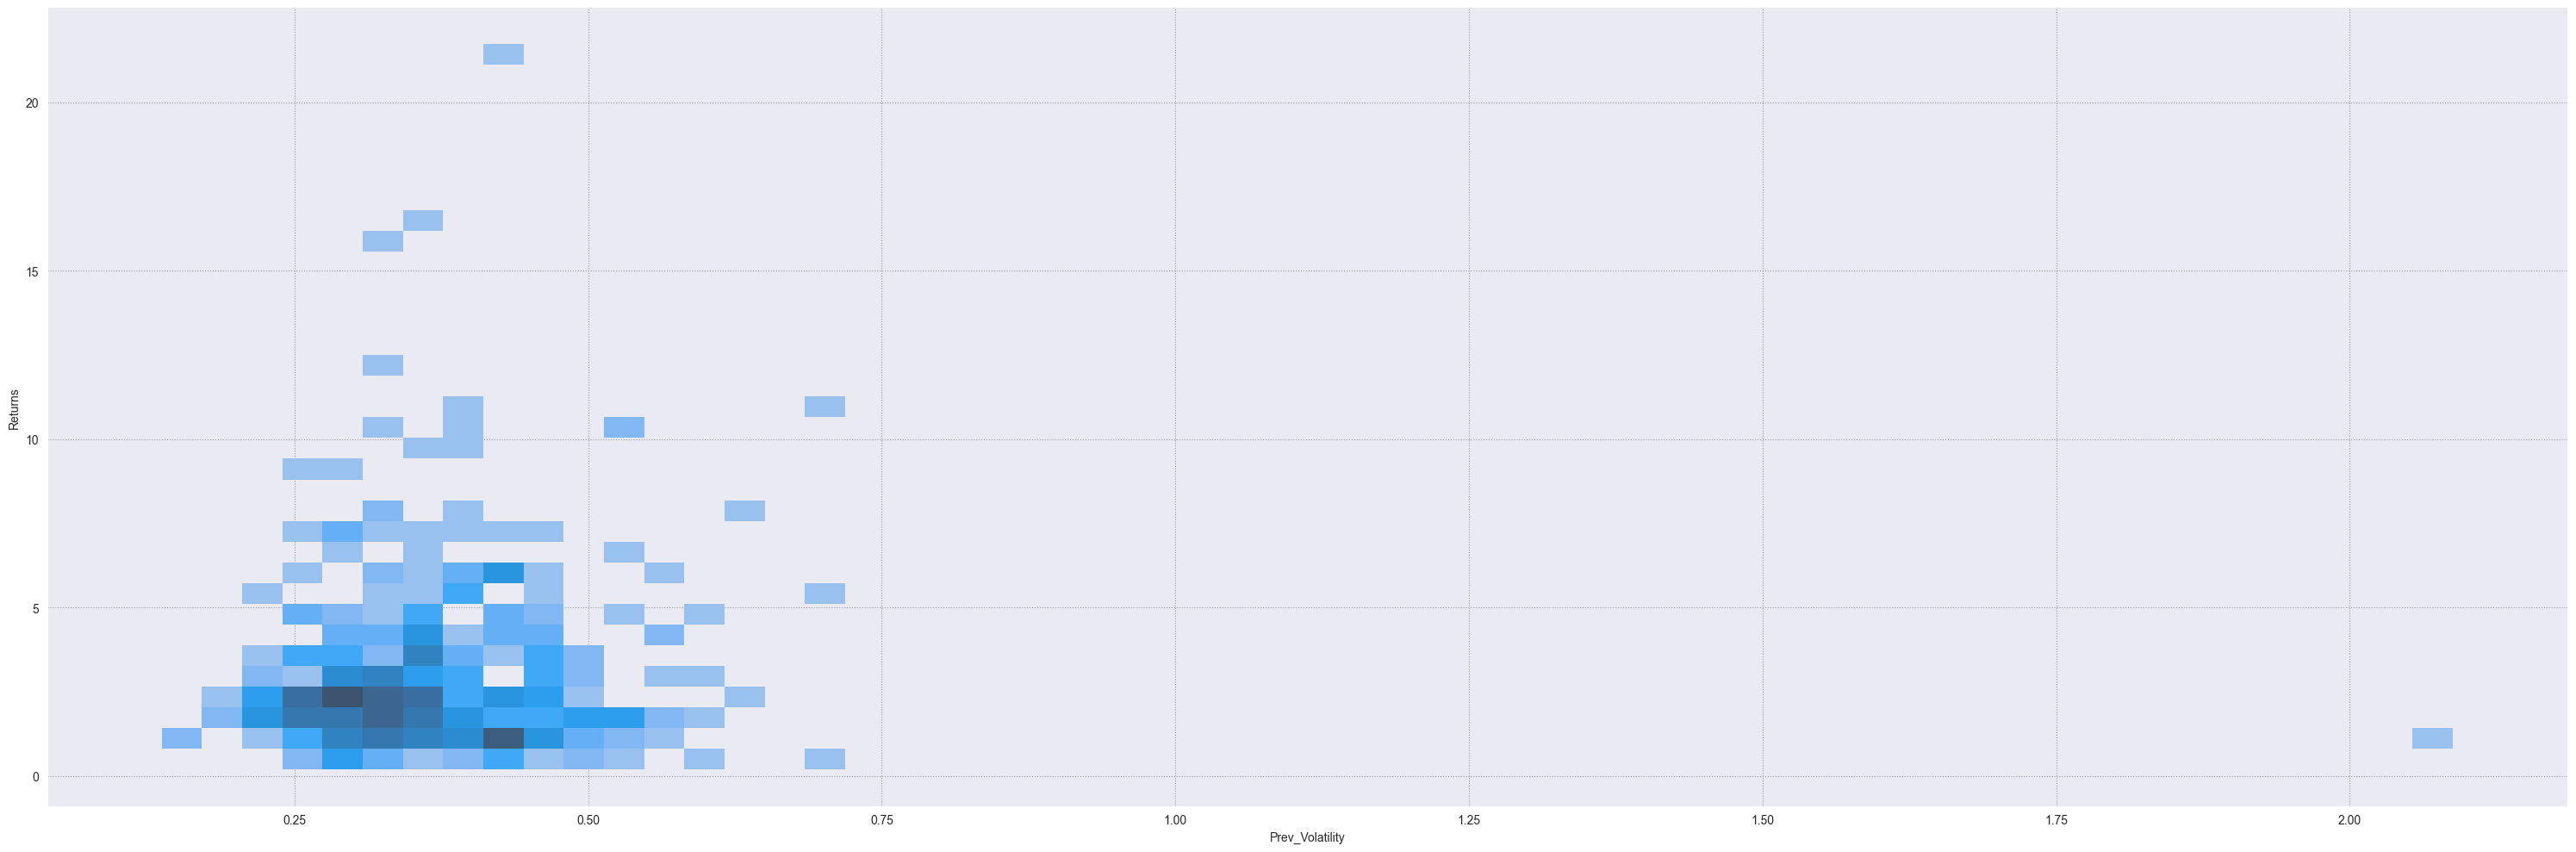

In [39]:
sns.displot(df,y="Returns",x="Prev_Volatility",height=10, aspect=3)

In [42]:
# outlier
df=df[df["Prev_Volatility"]<=0.7]

In [15]:
# df=df[df["Volatility"]<=6]
# df=df[df["Volatility"]>=0.2]
# df=df[df["Prev_Returns_CAGR"]>=100]

,Symbol,WinRate,Returns,Actual_Ret,Prev_Volatility,Prev_Returns_CAGR,Previous_Sharpe,No.,CAGR,Vol,Sharpe,Drawdown,Calmar
0,OMAXE,45.454545,1.082317,0.413652,0.136941,-2.334340,-0.535584,11,0.893488,19.184492,-0.214054,31.841493,0.028060
1,HDFCBANK,80.000000,1.302759,1.592621,0.160597,29.061961,1.498279,5,3.018786,8.944956,-0.221490,10.134607,0.297869
2,PGHH,66.666667,1.666598,1.612481,0.192800,21.454811,0.853463,9,5.911917,21.508934,0.042397,10.192311,0.580037
3,GLAXO,50.000000,2.019426,2.215972,0.200961,13.871967,0.441478,8,8.223812,32.120185,0.100367,21.521828,0.382115
4,COLPAL,77.777778,2.153682,2.403231,0.204077,19.823730,0.726380,9,9.009968,24.347628,0.164696,10.180818,0.884994
...,...,...,...,...,...,...,...,...,...,...,...,...,...
377,JSL,68.181818,7.853668,8.455611,0.627761,-15.666943,-0.329217,22,26.081314,56.000002,0.376452,43.433564,0.600488
378,ITI,70.000000,2.201410,2.369176,0.629166,5.903265,0.014357,10,9.278986,25.827897,0.165673,11.425104,0.812158
379,PCJEWELLER,63.157895,10.686873,0.151564,0.693912,2.489738,-0.036176,19,30.525104,65.400511,0.390289,19.396212,1.573766
380,JPASSOCIAT,64.285714,5.600478,0.741627,0.713636,-4.571925,-0.134129,14,21.377382,50.653116,0.323324,19.501030,1.096218


# Conditions

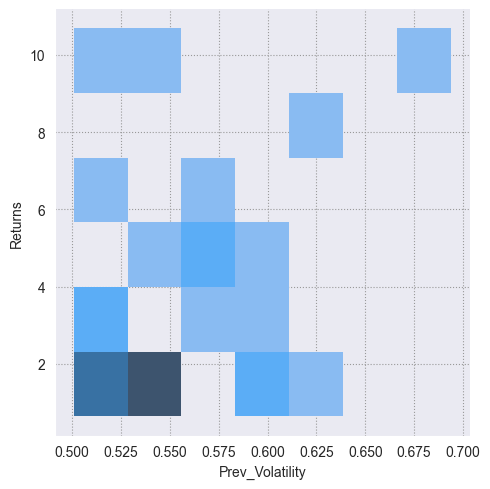

In [44]:
# df=df[df["Returns"]>=4]
df=df[df["Prev_Volatility"]>=0.5]
df=df[df["Prev_Volatility"]<=0.75]
# df=df[df["Prev_Returns_CAGR"]>=10]
# df=df[df["Prev_Returns_CAGR"]<=40]
# df=df[df["Previous_Sharpe"]>=-1]
# df=df[df["Previous_Sharpe"]<=1]
# Create the distribution plot with background grids
sns.displot(df, y="Returns", x="Prev_Volatility")


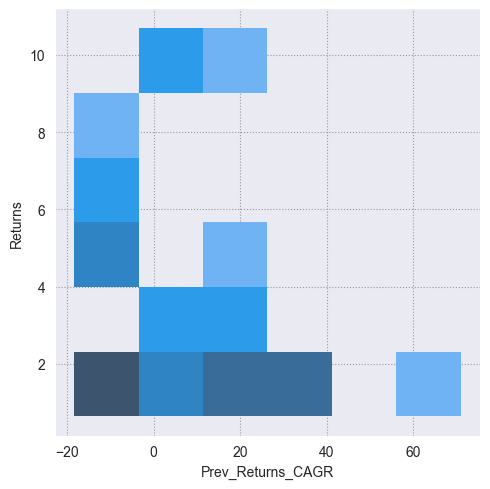

In [45]:
sns.displot(df,y="Returns",x="Prev_Returns_CAGR")

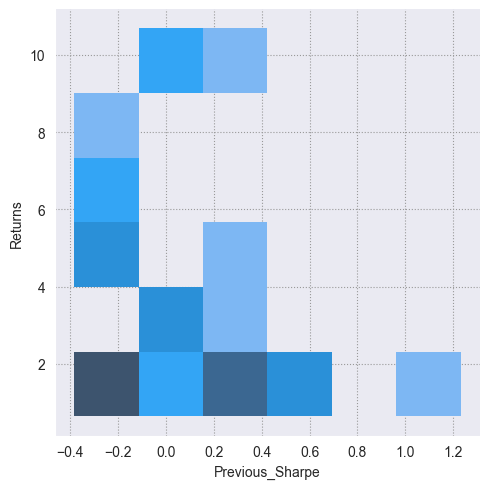

In [46]:
sns.displot(df,y="Returns",x="Previous_Sharpe")

In [47]:
returns = df["Returns"].sum()
act_ret = df["Actual_Ret"].sum()

In [48]:
print(returns,act_ret, returns/act_ret)

107.235339628 84.52770544799999 1.2686413177744351


In [49]:
df.shape

(31, 13)

In [50]:
df[df["Returns"] < 1].shape

(5, 13)

In [51]:
100*df[df["Returns"] < 1].shape[0]/df.shape[0]

16.129032258064516

In [54]:
df

,Symbol,WinRate,Returns,Actual_Ret,Prev_Volatility,Prev_Returns_CAGR,Previous_Sharpe,No.,CAGR,Vol,Sharpe,Drawdown,Calmar
349,TRIDENT,66.666667,3.608605,5.010239,0.500742,12.086818,0.141526,9,15.524129,37.083222,0.283798,19.365722,0.801629
350,RENUKA,50.000000,1.953800,2.583333,0.503500,-1.509491,-0.129285,16,7.822506,35.534199,0.079431,28.631994,0.273209
351,BLISSGVS,45.454545,2.866975,0.509213,0.507762,18.445628,0.264802,11,12.573773,45.123206,0.167847,20.512684,0.612976
352,DEN,28.571429,0.931564,0.462946,0.508603,-8.840498,-0.272128,14,-0.793992,30.626775,-0.189181,41.537866,-0.019115
353,HATHWAY,55.555556,0.652873,0.543161,0.509327,-3.569911,-0.168259,9,-4.681423,19.795420,-0.489074,48.135641,-0.097255
354,DELTACORP,58.823529,1.641231,0.404906,0.517230,24.756164,0.381961,17,5.729405,38.088770,0.019150,49.516709,0.115706
355,BOMDYEING,76.190476,10.624405,0.643752,0.517747,2.530279,-0.047701,21,30.439086,42.222227,0.602505,19.321369,1.575410
356,JUSTDIAL,36.363636,1.541505,2.068904,0.519728,-3.590922,-0.165297,11,4.986720,32.729872,-0.000406,27.861622,0.178982
357,RAIN,42.857143,1.120019,0.441474,0.523620,27.253303,0.424989,14,1.282725,49.631458,-0.074898,60.728798,0.021122
358,ADANIPOWER,70.000000,6.634928,28.962407,0.525443,-7.108278,-0.230439,20,23.712995,61.228490,0.305626,34.954682,0.678393
